In [1]:

import mnist


train_image = mnist.train_images()
train_target = mnist.train_labels() 
test_image = mnist.test_images()
test_target = mnist.test_labels()


print(train_image.shape)
print(train_target.shape)
print(test_image.shape)
print(test_image.shape)
print(test_target.shape)



(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000, 28, 28)
(10000,)


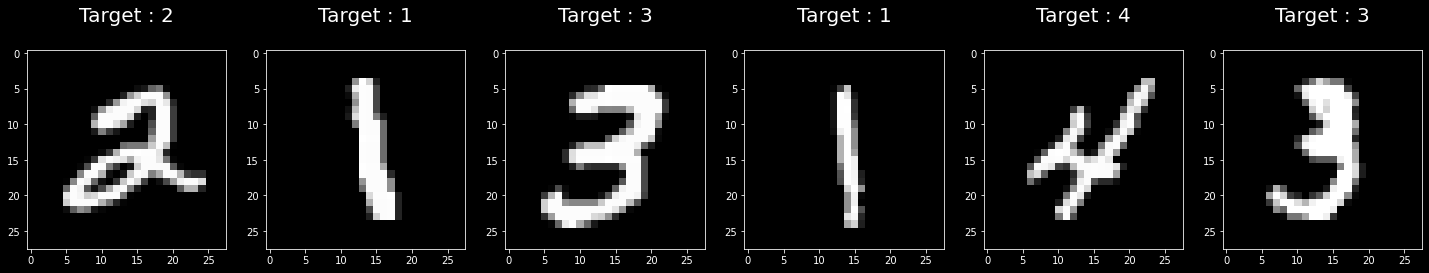

In [2]:

import matplotlib.pyplot as plt


plt.figure(figsize=(25, 4))
for i, (image, label) in enumerate(zip(train_image[5:11], train_target[5:11])):
    plt.subplot(1,6,i + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Target : %i\n' % label, fontsize=20)
    print()



In [3]:

import numpy as np


train_Image = np.reshape(train_image, (-60000, 28*28))[:1000]
train_Target = train_target[:1000]

test_Image = np.reshape(test_image, (-10000, 28*28))[:300]
test_Target = test_target[:300]

print(train_Image.shape)
print(train_Target.shape)
print(test_Image.shape)
print(test_Target.shape)




(1000, 784)
(1000,)
(300, 784)
(300,)


In [4]:

from sklearn.svm import SVC

svm = SVC().fit(train_Image, train_Target)

score = svm.score(test_Image, test_Target)
print('score = %.2f' % score +"%")



score = 0.90%


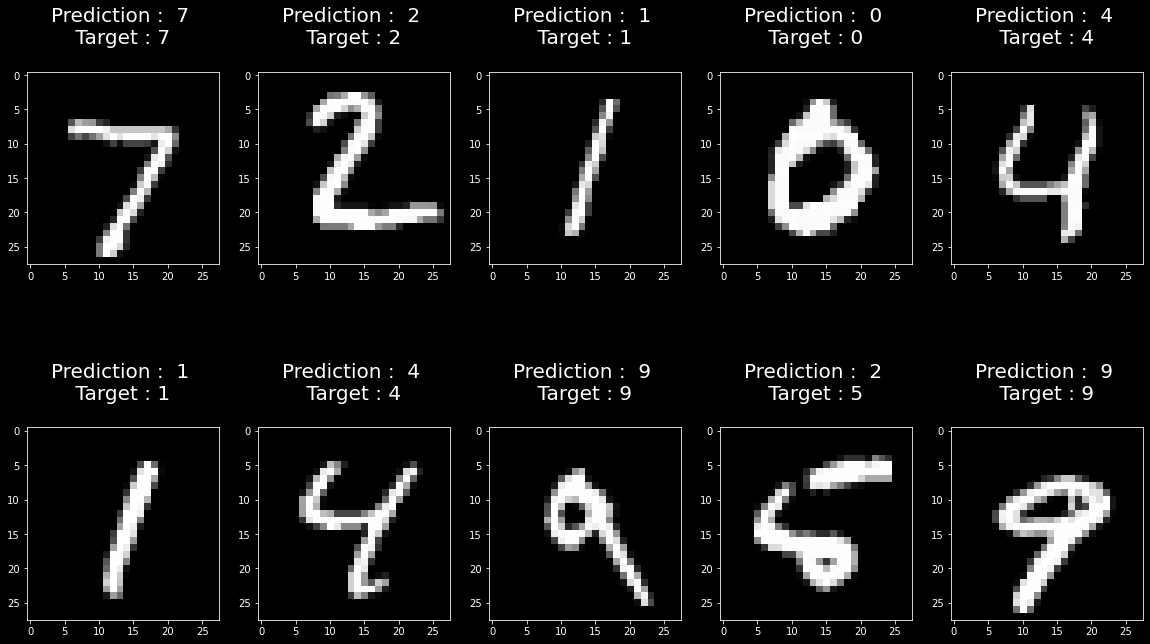

In [5]:


predictions = svm.predict(test_Image)

plt.figure(figsize=(20, 12))
for i, (image, label) in enumerate(zip(test_Image[0:10], predictions[0:10])):
    plt.subplot(2,5, i+ 1)
    plt.imshow(np.reshape(image,(28,28)), cmap=plt.cm.gray)
    plt.title('Prediction :  %i \n Target : %i \n ' % (label,test_Target[i]) ,fontsize=20)



In [6]:

from sklearn.metrics import classification_report

predictions = svm.predict(test_Image)

print(classification_report(test_Target ,predictions))



              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       0.98      1.00      0.99        41
           2       0.88      0.94      0.91        32
           3       1.00      0.75      0.86        24
           4       0.85      0.95      0.90        37
           5       0.76      0.86      0.81        29
           6       0.95      0.79      0.86        24
           7       0.84      0.91      0.87        34
           8       1.00      0.86      0.92        21
           9       0.94      0.88      0.91        34

    accuracy                           0.90       300
   macro avg       0.92      0.89      0.90       300
weighted avg       0.91      0.90      0.90       300



In [7]:

from sklearn.metrics import confusion_matrix


predictions = svm.predict(test_Image)
matrice = confusion_matrix(test_Target, predictions)
print("matrice de confusion : \n", matrice)



matrice de confusion : 
 [[24  0  0  0  0  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  0  0  0]
 [ 0  0 30  0  1  0  0  1  0  0]
 [ 0  0  1 18  0  5  0  0  0  0]
 [ 0  0  0  0 35  0  1  0  0  1]
 [ 0  1  1  0  0 25  0  2  0  0]
 [ 1  0  2  0  1  1 19  0  0  0]
 [ 0  0  0  0  2  0  0 31  0  1]
 [ 0  0  0  0  1  1  0  1 18  0]
 [ 0  0  0  0  1  1  0  2  0 30]]


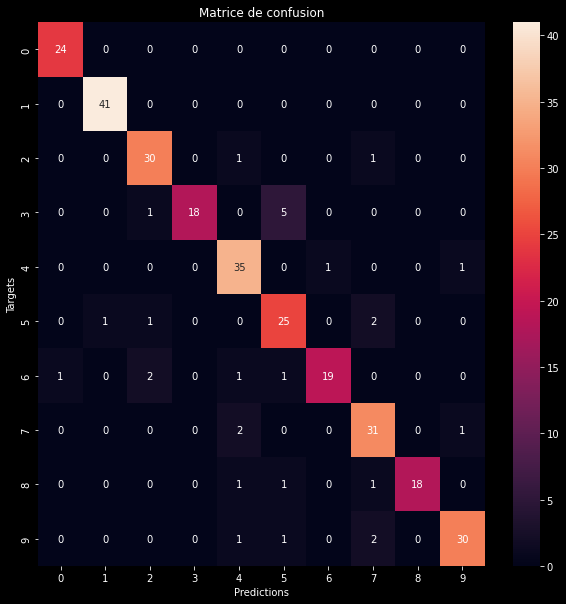

In [8]:

import seaborn as sb
import matplotlib.pyplot as plt



plt.subplots(figsize=(10, 10))
sb.heatmap(matrice, annot = True, fmt = 'g')
plt.xlabel("Predictions")
plt.ylabel("Targets")
plt.title("Matrice de confusion")
plt.show()


